# ResNet의 구조

출처  
___original paper : Deep Residual Learning for Image Recognition___

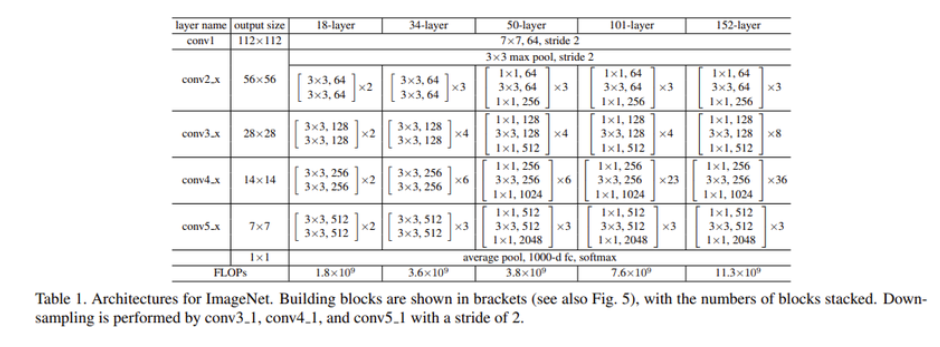



오늘의 학습 목표로 ResNet 34-layer과 50-layer을 구현할 것이다.  
첫 번째 conv1 block에서는 stride = 2 에 유의하고  
논문에서는 ImageNet Image를 224로 crop 하여 사용했음으로 output size가 112 x 112가 나왔다.  
CIFAR-10 Image를 사용하는 이 학습에서는 output이 16 x 16 으로 나올 것이다.

두 번째 block을 구현하기 위해서 함수를 정의할 예정임으로  
각 block을 자세히 보기로 했다.

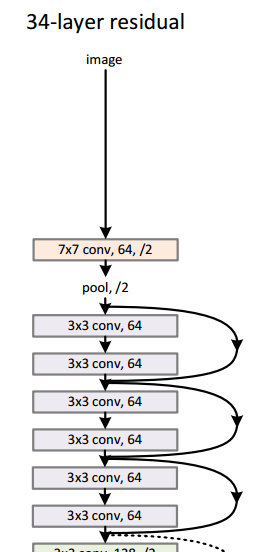

34-layer에서는 kernel size가 3으로 동일하지만  
50-layer에서는 kernel size가 1, 3으로 다름으로  
_앞으로 정의할 build_resnet_block 에서 `kernel size`를 인수로 받아야한다._  
_마찬가지로 `filtersize`도 서로 다름으로 추가로 받아야 한다._

또한, 대조군격인 Plain Model Block 설계를 위해서  
`skip connection 설정에 대한 여부`를  
받을 필요가 있다.

# 현재 이해가 가지 않는 두 가지
 - BatchNormalizaion과 같은 부과적인 layer을 어디에, 어떻게 추가할까  
 - dotted shortcut은 dimension이 증가한다고 하는데 왜 증가하는 거지?

_충격적인 사실_  
_Conv2D가 RGB 채널까지 처리하는 것을 오늘에서야 알았다._  
_RGB는 Conv3D로 처리하는 줄 알았는데 이게 아니었다._

## 이해가 가지 않는 부분, 첫 번째
___1. BatchNormalizaion과 같은 부과적인 layer을 어디에, 어떻게 추가할까___

논문의 3.4 Implementation을 참고하면  
>We adopt batch
normalization (BN) [16] right after each convolution and
before activation, following[16]

위 논문 인용에 따르면 block 안에서 `[convolution layer - BN - Activation]` 순서로 구성할 것을 제안했다.  
</br>  

하지만 또 다시 다음과 같은 의문점이 생겼다.
>The learning rate
starts from 0.1 and is divided by 10 when the error plateaus,
and the models are trained for up to 60 × 104
iterations

> We
use a weight decay of 0.0001 and a momentum of 0.9. We
do not use dropout [14], following the practice in [16].

 - Learning schedule를 작성하기 위해서 decay_step을 전달할 수 있지만 논문의 조건에 비추어 볼때, decay_step이 아닌 loss error를 통해 직접 구현해야할 듯 하다.
 - weight decay가 overfitting을 막기 위해서 라는 것은 이해했지만, 구현이 힘들 것이라 판단했다.

___따라서 전체적인 구조를 구현하는 것에 초점을 두기로 했다.___

## 이해가 가지 않는 부분, 두 번째
___2. dotted shortcut은 dimension이 증가한다고 하는데 왜 증가하는 거지?___


다음의 논문 인용에 따르면  
stride와 filtersize에 의해 dimension increase가 필요하다고 하고  
두 가지 옵션에 의해 해결할 수 있다고 한다.

>When the dimensions increase (dotted line shortcuts
in Fig. 3), we consider two options: (A) The shortcut still
performs identity mapping, with extra zero entries padded
for increasing dimensions. This option introduces no extra
parameter; (B) The projection shortcut in Eqn.(2) is used to
match dimensions (done by 1×1 convolutions). For both
options, when the shortcuts go across feature maps of two
sizes, they are performed with a stride of 2.

구현은 1x1 Conv2D strides = 2  
여기서도 BN을 실시한다.

참고로 Eqn(2)란 다음과 같다.  
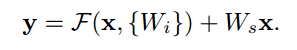

# 참고
추가로 optimizer의 momentum, learning schedule(decay)를 이해하기 위해서 다음의 영상을 참고하였다.  

_https://youtu.be/k8fTYJPd3_I_  
_https://youtu.be/QzulmoOg2JE_

ResNet 전체적인 이해  
_https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8_

Batch Size: DON’T DECAY THE LEARNING RATE,
INCREASE THE BATCH SIZE   
_https://arxiv.org/pdf/1711.00489.pdf#:~:text=(2017)%20trained%20a%20ResNet%2D,a%20momentum%20coefficient%20of%200.9._

Learning rate & Batch Size  
_https://inhovation97.tistory.com/32_

Learning Rate Schedule  
_https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/#:~:text=Keras%20has%20a%20time%2Dbased%20learning%20rate%20schedule%20built%20in.&text=When%20the%20decay%20argument%20is,effect%20on%20the%20learning%20rate.&text=When%20the%20decay%20argument%20is%20specified%2C%20it%20will%20decrease%20the,by%20the%20given%20fixed%20amount._

_https://rinha7.github.io/keras-callbacks/_

# 정리하자면

___Function argument___; build resnet block
```
input_size = (32, 32, 3)  
is_50 = False  
kernel_size = 3  
filtersize = 64  
is_plain = True
num_block = 3
```

___Hyper parameter___
```
learning_rate = 0.1  
alpha_lr = 0.1 # Learning rate is divided by 10 when the error plateaus  
weight_decay = 0.0001  
momentum = 0.9  
```

___Learning Schedule___
```
learning_rate
alpha_lr
momentum

```

## 주관적으로 정한 것

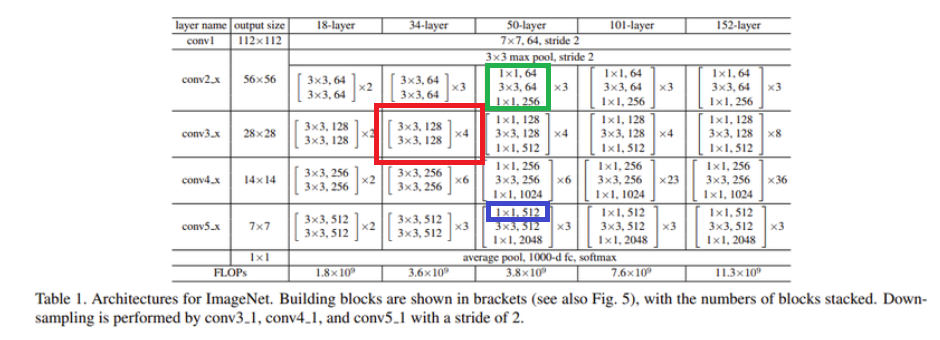

빨간색 사각형 : Stage  
초록색 사각형 : Block  
파란색 사각형 : Layers

파란색 사각형  
Conv2D - BN Layers

Stage란?  
Block * 오른쪽 수  
위 그림에서 layer name에서 convㅁ_x, ㅁ를 의미

## Layer Name

Stage[stage]_[block]_LayerName

# 결과만 미리보기
___

In [ ]:
# Naming을 위한 global variable
layer = 1

model_34 = build_resnet(input_size, num_blocks_ls, 10)
model_34.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv2D_1 (Conv2D)              (None, 16, 16, 64)   9472        ['Input[0][0]']                  
                                                                                                  
 BN_1 (BatchNormalization)      (None, 16, 16, 64)   256         ['Conv2D_1[0][0]']               
                                                                                                  
 Acti_1 (Activation)            (None, 16, 16, 64)   0           ['BN_1[0][0]']                   
                                                                                            

In [ ]:
# 50-layer ResNet
# Naming을 위한 global variable
layer = 1

model_50 = build_resnet(input_size, num_blocks_ls, 10, True)
model_50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv2D_1 (Conv2D)              (None, 16, 16, 64)   9472        ['Input[0][0]']                  
                                                                                                  
 BN_1 (BatchNormalization)      (None, 16, 16, 64)   256         ['Conv2D_1[0][0]']               
                                                                                                  
 Acti_1 (Activation)            (None, 16, 16, 64)   0           ['BN_1[0][0]']                   
                                                                                              

## 34 Layer Result

Text(0.5, 1.02, 'Validation Loss')

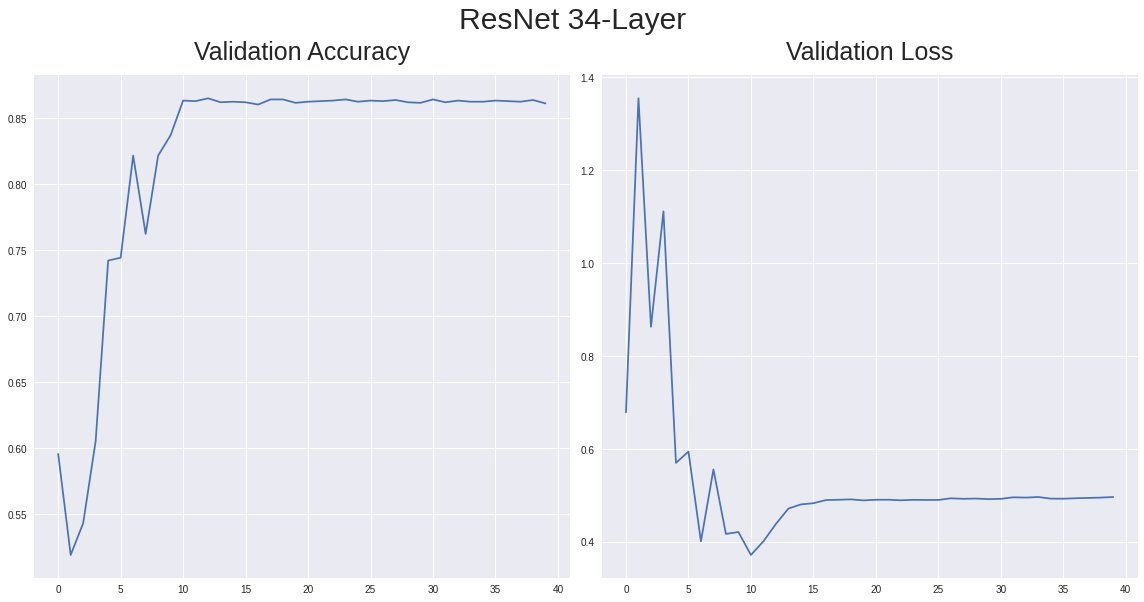

In [ ]:
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(40)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
# ResNet 34 Layer Test result
result = model_34.evaluate(test)

73/73 [==============================] - 9s 63ms/step - loss: 0.4636 - accuracy: 0.8704


## 50 Layer Result

Text(0.5, 1.02, 'Validation Loss')

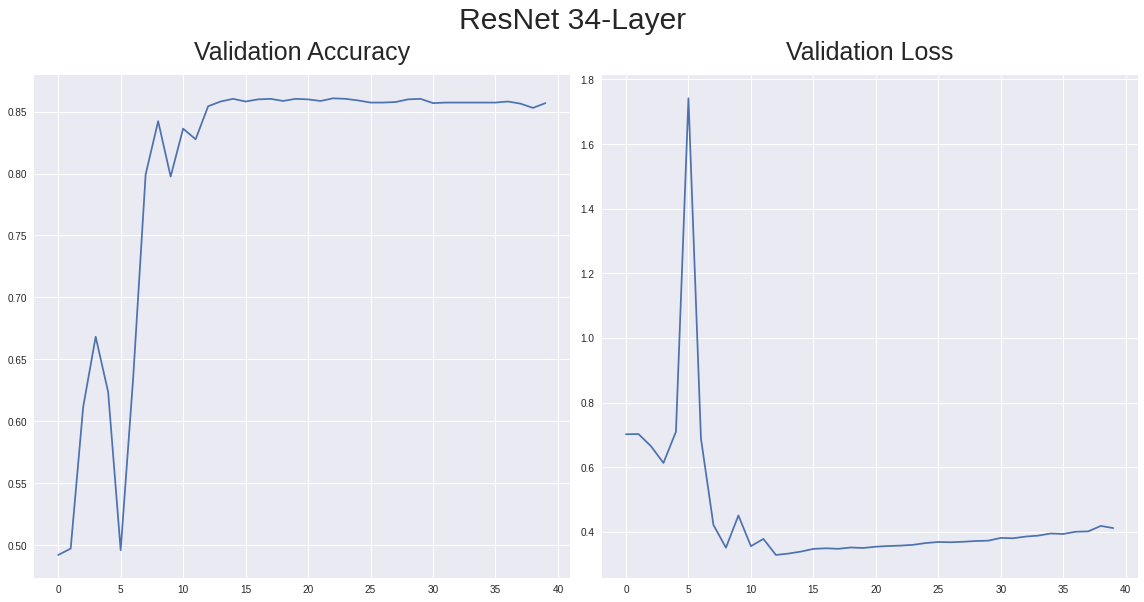

In [ ]:
# Layer 50
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(40)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
result = model_50.evaluate(test)

73/73 [==============================] - 11s 99ms/step - loss: 0.3886 - accuracy: 0.8598


# 최종 결과
__Ablation Study__  
___ResNet with skip connection vs Plain___  
_15 Epoch_

Test accuracy

||ResNet|Plain|
|:---:|:---:|:---:|
|34 Layer|87.04%|75.21%|
|50 Layer|85.98%|X|

Validation Accuracy

||ResNet|Plain|
|:---:|:---:|:---:|
|34 Layer|86.25%|75.33%|
|50 Layer|86.03%|X|

여러 차례 시도해보았지만 50-Layer Plain 의미있는  
결과를 내지 못했고, 결국 F1 score가 낮게 나왔다.

# ResNet

## Set up

In [1]:
import shutil
import glob
import os
import sys
import pickle
import random

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import tensorflow as tf

In [2]:
random_seed = 1234

random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [3]:
%matplotlib inline

# plt.style.use('default')
plt.style.use('seaborn')
mpl.rcParams['figure.figsize'] = (7, 7)
# mpl.rcParams['xtick.labelbottom'] = False
# mpl.rcParams['ytick.labelleft'] = False
# mpl.rcParams['axes.grid'] = False
mpl.rcParams.update({'figure.autolayout': True})

warnings.filterwarnings('ignore')

In [4]:
# this code is for not printing warning error info
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.layers import Dense, Conv2D, Input, Activation, BatchNormalization, Add, MaxPooling2D, GlobalAveragePooling2D, Flatten
from keras.models import Model

In [6]:
path_drive = '/content/drive/MyDrive/Colab Notebooks/GoingDeeper/2'

## Figure out

In [ ]:
# Simulate model building
# Build top convolution layer; conv1 7x7 stride Conv layer and Maxpooling layer
input_size = (32, 32, 3)
inputs = Input(shape=input_size, name='Input')
x = Conv2D(64, 7, strides=2, kernel_initializer='he_normal', activation='relu', padding='same', name='Conv2D_1')(inputs)
x = BatchNormalization(name='BN_1')(x)
x = Activation('relu', name='Acti_1')(x)
x = MaxPooling2D(3, strides=2, padding='same', name='MaxPooling2D_2')(x)

# model = Model(inputs, x)
# model.summary()

In [7]:
# 50-layer의 경우도 Conv2D - BN - Activation 순으로 설정
# 추가 자료를 통해 논문 저자가 의도한 layers가 아닐 경우에 다시 시도
# Conv2D와 BN을 묶은 Layers function
def build_resnet_layers(
    input,
    block_num,
    stage,
    filters=64,
    kernel_size=3):  

  global layer  

  x = Conv2D(filters, kernel_size, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_{block_num}_Conv2D_{layer}')(input); layer += 1
  x = BatchNormalization(name=f'Stage{stage}_{block_num}_BN_{layer}')(x);layer += 1
  return x

In [8]:
# filters can be list in 50-layer
def build_resnet_stage(
    input_layer, 
    is_50 = False, 
    is_plain = False,
    filters = 64, 
    block_num = 3,
    stage=1,
    dotted=True):
  
  global layer
  
  # 50-layer의 경우 filters가 layer마다 값이 다름으로 리스트로 받아야만 한다.
  if is_50: assert filters is not list
  # 50-layer kernel_size list
  ls_50 = [1, 3]

  x = input_layer
  
  if not is_plain:
    # 30-layer building
    if not is_50:
      if not dotted:
        for num in range(1, block_num+1):
          # skip connection
          identity_input = x

          x = build_resnet_layers(x, num, stage, filters);
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = build_resnet_layers(x, num, stage, filters); 
          x = Add(name=f'Stage{stage}_{block_num}_Add_{layer}')([identity_input, x]); layer+=1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
      else:
        identity_input = x
        x = Conv2D(filters, 3, strides=2 , padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D')(x)
        x = BatchNormalization(name=f'Stage{stage}_1_BN')(x)
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_')(x)
        x = BatchNormalization(name=f'Stage{stage}_1_BN_')(x); layer+=1

        # dimension increase
        short = Conv2D(filters, 1, strides=2, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Short')(identity_input)
        short = BatchNormalization(name=f'Stage{stage}_1_BN_Short')(short)

        layer+=1
        x = Add(name=f'Stage{stage}_1_Add_{layer}')([x, short]); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          # skip connection
          identity_input = x

          x = build_resnet_layers(x, num, stage, filters)
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = build_resnet_layers(x, num, stage, filters)
          x = Add(name=f'Stage{stage}_{block_num}_Add_{layer}')([identity_input, x]); layer+=1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x)
    
    # build 50-layer ResNet
    else:
      if not dotted:
        # skip connection
        identity_input = x
        num = 1

        for kernel in ls_50:
          x = build_resnet_layers(x, num, stage, filters, kernel)
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1

        # dimension increase
        short = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Short')(identity_input)
        short = BatchNormalization(name=f'Stage{stage}_1_BN_Short')(short)

        x = Add(name=f'Stage{stage}_{block_num}_Add_{layer}')([x, short]); layer+=1
        x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          # skip connection
          identity_input = x

          for kernel in ls_50:
            x = build_resnet_layers(x, num, stage, filters, kernel)
            x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
          x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1
          x = Add(name=f'Stage{stage}_{block_num}_Add_{layer}')([identity_input, x]); layer+=1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
      else:
        identity_input = x

        x = Conv2D(filters, kernel_size=1, strides=2, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN{layer}')(x); layer+=1

        # dimension increase
        short = Conv2D(filters*4, 1, strides=2, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Short')(identity_input)
        short = BatchNormalization(name=f'Stage{stage}_1_BN_Short')(short)

        x = Add(name=f'Stage{stage}_1_Add_{layer}')([x, short]); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          # skip connection
          identity_input = x

          for kernel in ls_50:
            x = build_resnet_layers(x, num, stage, filters, kernel)
            x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
          x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1
          x = Add(name=f'Stage{stage}_{block_num}_Add_{layer}')([identity_input, x]); layer+=1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1

  # Plain Model
  else:
    if not is_50:
      if not dotted:
        for num in range(1, block_num+1):
          x = build_resnet_layers(x, num, stage, filters);
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = build_resnet_layers(x, num, stage, filters);
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
      else:
        x = Conv2D(filters, 3, strides=2 , padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D')(x)
        x = BatchNormalization(name=f'Stage{stage}_1_BN')(x)
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_')(x)
        x = BatchNormalization(name=f'Stage{stage}_1_BN_')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          x = build_resnet_layers(x, num, stage, filters)
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = build_resnet_layers(x, num, stage, filters)
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x)
          
      # 50 layer
    else:
      if not dotted:
        num = 1

        for kernel in ls_50:
          x = build_resnet_layers(x, num, stage, filters, kernel)
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1
        x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          for kernel in ls_50:
            x = build_resnet_layers(x, num, stage, filters, kernel)
            x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
          x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
      else:

        x = Conv2D(filters, kernel_size=1, strides=2, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1
        x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D{layer}')(x); layer+=1
        x = BatchNormalization(name=f'Stage{stage}_1_BN{layer}')(x); layer+=1
        x = Activation('relu', name=f'Stage{stage}_1_Acti_{layer}')(x); layer+=1

        for num in range(2, block_num+1):
          for kernel in ls_50:
            x = build_resnet_layers(x, num, stage, filters, kernel)
            x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
          x = Conv2D(filters*4, 1, padding='same', kernel_initializer='he_normal', name=f'Stage{stage}_1_Conv2D_{layer}')(x); layer += 1
          x = BatchNormalization(name=f'Stage{stage}_1_BN_{layer}')(x); layer += 1
          x = Activation('relu', name=f'Stage{stage}_{num}_Acti_{layer}')(x); layer+=1
  return x

In [9]:
# filters; stage와 34, 50-layer를 통해 알 수 있으므로 받지 않는다.
def build_resnet(
    input_size,
    num_blocks_ls,
    num_classes,
    is_50 = False,
    is_plain = False):

  inputs = Input(shape=input_size, name='Input')
  x = Conv2D(64, 7, strides=2, kernel_initializer='he_normal', activation='relu', padding='same', name='Conv2D_1')(inputs)
  x = BatchNormalization(name='BN_1')(x)
  x = Activation('relu', name='Acti_1')(x)
  x = MaxPooling2D(3, strides=2, padding='same', name='MaxPooling2D_2')(x)

  for stage, num_blocks in enumerate(num_blocks_ls):
    stage += 1
    filters = 64*2**(stage-1)

    # stage 1에서는 dotted shortcut이 없으므로 그냥 진행하면 되지만 아닌 경우에는 size 처리가 필요하다.
    if stage == 1:
      x = build_resnet_stage(x, is_50, is_plain, filters, num_blocks, stage, dotted=False)
    else:
      x = build_resnet_stage(x, is_50, is_plain, filters, num_blocks, stage, dotted=True)
    
  x = GlobalAveragePooling2D(name="GAP")(x)
  x = Dense(num_classes, activation='softmax', name=f'AffineLayer_{num_classes}')(x)

  return Model(inputs, x)


In [10]:
input_size = (32, 32, 3)
learning_rate = 0.1  
alpha_lr = 0.1 # Learning rate is divided by 10 per 10 epochs; decay step
weight_decay = 0.0001  
momentum = 0.9  
epochs = 40
num_blocks_ls = [3, 4, 6, 3]

In [ ]:
%%capture
# Naming을 위한 global variable
layer = 1

model_34 = build_resnet(input_size, num_blocks_ls, 10)
model_34.summary()

In [ ]:
%%capture
# 50-layer ResNet
# Naming을 위한 global variable
layer = 1

model_50 = build_resnet(input_size, num_blocks_ls, 10, True)
model_50.summary()

## 데이터

In [11]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
train, val, test = tfds.load(
    "cats_vs_dogs",
    split=["train[:70%]", "train[70%:80%]", "train[80%:]"],
    as_supervised=True
)
len(train), len(val), len(test)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete2HAFCF/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


(16283, 2327, 4652)

Label: 1
tf.Tensor([262 350   3], shape=(3,), dtype=int32)
Label: 1
tf.Tensor([409 336   3], shape=(3,), dtype=int32)
Label: 1
tf.Tensor([493 500   3], shape=(3,), dtype=int32)
Label: 0
tf.Tensor([375 500   3], shape=(3,), dtype=int32)


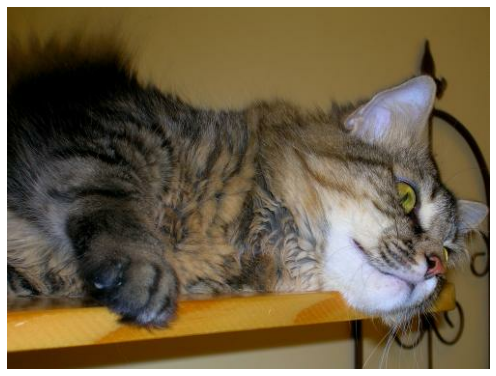

In [ ]:
for data in train.take(4):
    image, label = data[0], data[1]
    plt.imshow(image.numpy()[:, :, :])
    plt.axis('off')
    print("Label: %d" % label.numpy())
    print(tf.shape(image))

### Data Batch and Labeling

In [12]:
# image resize
input_size = (224, 224)

def preprocess_dataset(image, label):
    image = tf.image.resize(image, (input_size[0], input_size[1]))
    label = tf.one_hot(label, depth=2)
    return (image, label)

In [13]:
# 논문에서 제시한 BATCH SIZE 256 -> 64로
# BATCH SIZE와 LEARNING RATE에 따른
# 학습의 결과가 매우 다름으로 변경할 수 있다.
# 주의해야할 점은 위의 출력에서 봤 듯이 image shape이 모두 다르다는 점이다.
BUFFER_SIZE = 24000
BATCH_SIZE = 64

train = (
    train.shuffle(BUFFER_SIZE)
    .map(preprocess_dataset)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)
train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [14]:
val = (
    val.shuffle(BUFFER_SIZE)
    .map(preprocess_dataset)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)
val

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

## 모델 Compile

### Callback

#### Learning Rate

In [15]:
# when error plateau
# lr = lr * 0.1
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)
reduce_lr

#### CheckPoint

In [ ]:
file_path = path_drive + '/checkpoint'
check_point = tf.keras.callbacks.ModelCheckpoint(file_path, verbose=1, save_best_only=True)
check_point

### Optimizer

In [16]:
SGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
SGD

### Fitting

#### 정리
```
Input_size = (224, 224)
BUFFER_SIZE = 24000
BATCH_SIZE = 256

learning_rate = 0.1  
alpha_lr = 0.1 # Learning rate is divided by 10 per 10 epochs; decay step
weight_decay = 0.0001  
momentum = 0.9  
epochs = 40
```

In [ ]:
input_size = (224, 224, 3)
epochs = 40
num_blocks_ls = [3, 4, 6, 3]
num_classes = 2

layer = 1
model_34 = build_resnet(input_size, num_blocks_ls, num_classes)
model_34.summary()

In [ ]:
model_34.compile(SGD, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_34.fit(train, validation_data=val, callbacks=[check_point, reduce_lr], epochs=epochs, use_multiprocessing=True)

Epoch 1/40
255/255 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.5978
Epoch 1: val_loss improved from inf to 0.67864, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


255/255 [==============================] - 77s 255ms/step - loss: 0.7323 - accuracy: 0.5978 - val_loss: 0.6786 - val_accuracy: 0.5956 - lr: 0.1000
Epoch 2/40
255/255 [==============================] - ETA: 0s - loss: 0.5906 - accuracy: 0.6879
Epoch 2: val_loss did not improve from 0.67864
255/255 [==============================] - 56s 189ms/step - loss: 0.5906 - accuracy: 0.6879 - val_loss: 1.3544 - val_accuracy: 0.5191 - lr: 0.1000
Epoch 3/40
255/255 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7304
Epoch 3: val_loss did not improve from 0.67864
255/255 [==============================] - 58s 191ms/step - loss: 0.5348 - accuracy: 0.7304 - val_loss: 0.8627 - val_accuracy: 0.5432 - lr: 0.1000
Epoch 4/40
255/255 [==============================] - ETA: 0s - loss: 0.4639 - accuracy: 0.7794
Epoch 4: val_loss did not improve from 0.67864
255/255 [==============================] - 57s 191ms/step - loss: 0.4639 - accuracy: 0.7794 - val_loss: 1.1112 - val_accuracy: 0.6

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


255/255 [==============================] - 72s 253ms/step - loss: 0.3887 - accuracy: 0.8217 - val_loss: 0.5700 - val_accuracy: 0.7422 - lr: 0.0100
Epoch 6/40
255/255 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8591
Epoch 6: val_loss did not improve from 0.56997
255/255 [==============================] - 57s 191ms/step - loss: 0.3226 - accuracy: 0.8591 - val_loss: 0.5942 - val_accuracy: 0.7443 - lr: 0.0100
Epoch 7/40
255/255 [==============================] - ETA: 0s - loss: 0.2956 - accuracy: 0.8708
Epoch 7: val_loss improved from 0.56997 to 0.40106, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


255/255 [==============================] - 73s 255ms/step - loss: 0.2956 - accuracy: 0.8708 - val_loss: 0.4011 - val_accuracy: 0.8217 - lr: 0.0100
Epoch 8/40
255/255 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.8868
Epoch 8: val_loss did not improve from 0.40106
255/255 [==============================] - 57s 191ms/step - loss: 0.2643 - accuracy: 0.8868 - val_loss: 0.5557 - val_accuracy: 0.7624 - lr: 0.0100
Epoch 9/40
255/255 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9073
Epoch 9: val_loss did not improve from 0.40106
255/255 [==============================] - 57s 191ms/step - loss: 0.2249 - accuracy: 0.9073 - val_loss: 0.4171 - val_accuracy: 0.8217 - lr: 0.0100
Epoch 10/40
255/255 [==============================] - ETA: 0s - loss: 0.1830 - accuracy: 0.9240
Epoch 10: val_loss did not improve from 0.40106
255/255 [==============================] - 57s 191ms/step - loss: 0.1830 - accuracy: 0.9240 - val_loss: 0.4212 - val_accuracy: 0

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint/assets


255/255 [==============================] - 73s 255ms/step - loss: 0.0960 - accuracy: 0.9649 - val_loss: 0.3718 - val_accuracy: 0.8633 - lr: 1.0000e-03
Epoch 12/40
255/255 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9819
Epoch 12: val_loss did not improve from 0.37179
255/255 [==============================] - 57s 191ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.4011 - val_accuracy: 0.8629 - lr: 1.0000e-03
Epoch 13/40
255/255 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9862
Epoch 13: val_loss did not improve from 0.37179
255/255 [==============================] - 57s 191ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.4385 - val_accuracy: 0.8651 - lr: 1.0000e-03
Epoch 14/40
255/255 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9918
Epoch 14: val_loss did not improve from 0.37179
255/255 [==============================] - 57s 191ms/step - loss: 0.0311 - accuracy: 0.9918 - val_loss: 0.4716 -

In [ ]:
test = (
    test.shuffle(BUFFER_SIZE)
    .map(preprocess_dataset)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

Text(0.5, 1.02, 'Validation Loss')

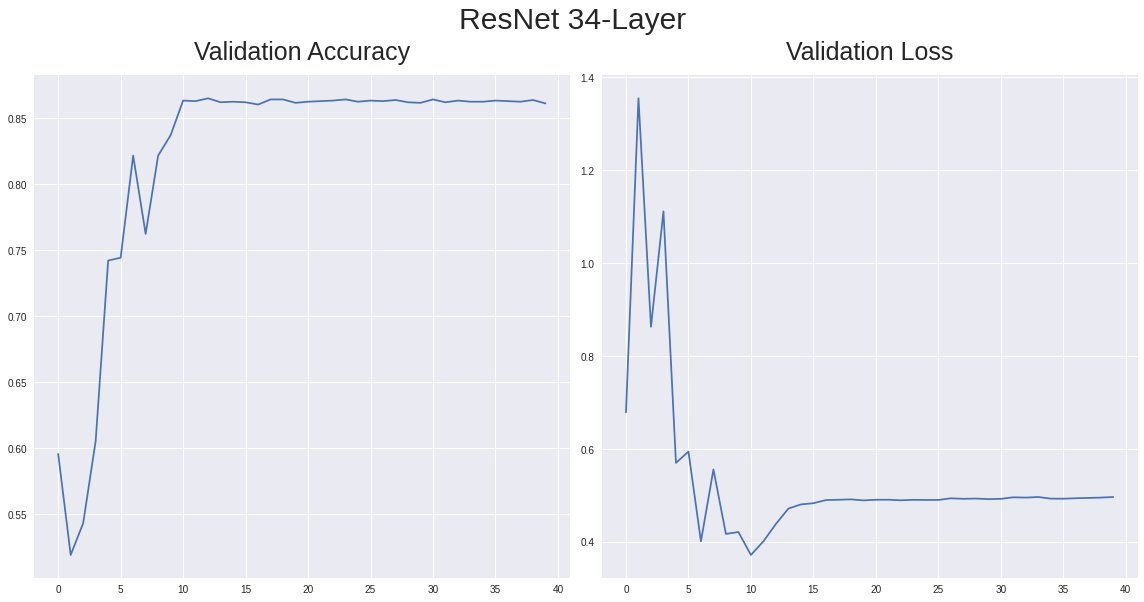

In [ ]:
# Layer 30
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(40)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
result = model_34.evaluate(test)

73/73 [==============================] - 9s 63ms/step - loss: 0.4636 - accuracy: 0.8704


In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

file_path = path_drive + '/checkpoint_50'
check_point = tf.keras.callbacks.ModelCheckpoint(file_path, verbose=1, save_best_only=True)

input_size = (224, 224, 3)
epochs = 40
num_blocks_ls = [3, 4, 6, 3]
num_classes = 2

layer = 1
model_50 = build_resnet(input_size, num_blocks_ls, num_classes, is_50=True)
model_50.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2D_1 (Conv2D)              (None, 112, 112, 64  9472        ['Input[0][0]']                  
                                )                                                                 
                                                                                                  
 BN_1 (BatchNormalization)      (None, 112, 112, 64  256         ['Conv2D_1[0][0]']               
                                )                                                           

In [ ]:
SGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model_50.compile(SGD, loss='binary_crossentropy', metrics=['accuracy'])
history = model_50.fit(train, validation_data=val, callbacks=[check_point, reduce_lr], epochs=epochs, use_multiprocessing=True)

Epoch 1/40
255/255 [==============================] - ETA: 0s - loss: 0.9293 - accuracy: 0.5020
Epoch 1: val_loss did not improve from 0.68187
255/255 [==============================] - 97s 324ms/step - loss: 0.9293 - accuracy: 0.5020 - val_loss: 0.7018 - val_accuracy: 0.4920 - lr: 0.1000
Epoch 2/40
255/255 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5206
Epoch 2: val_loss did not improve from 0.68187
255/255 [==============================] - 89s 319ms/step - loss: 0.6940 - accuracy: 0.5206 - val_loss: 0.7025 - val_accuracy: 0.4972 - lr: 0.1000
Epoch 3/40
255/255 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.5887
Epoch 3: val_loss improved from 0.68187 to 0.66496, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 111s 407ms/step - loss: 0.6755 - accuracy: 0.5887 - val_loss: 0.6650 - val_accuracy: 0.6115 - lr: 0.1000
Epoch 4/40
255/255 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.6421
Epoch 4: val_loss improved from 0.66496 to 0.61314, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 113s 412ms/step - loss: 0.6324 - accuracy: 0.6421 - val_loss: 0.6131 - val_accuracy: 0.6682 - lr: 0.1000
Epoch 5/40
255/255 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.6967
Epoch 5: val_loss did not improve from 0.61314
255/255 [==============================] - 90s 321ms/step - loss: 0.5848 - accuracy: 0.6967 - val_loss: 0.7097 - val_accuracy: 0.6235 - lr: 0.1000
Epoch 6/40
255/255 [==============================] - ETA: 0s - loss: 0.5199 - accuracy: 0.7477
Epoch 6: val_loss did not improve from 0.61314
255/255 [==============================] - 90s 321ms/step - loss: 0.5199 - accuracy: 0.7477 - val_loss: 1.7409 - val_accuracy: 0.4959 - lr: 0.1000
Epoch 7/40
255/255 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.7809
Epoch 7: val_loss did not improve from 0.61314
255/255 [==============================] - 90s 321ms/step - loss: 0.4707 - accuracy: 0.7809 - val_loss: 0.6891 - val_accuracy: 0.

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 113s 411ms/step - loss: 0.3855 - accuracy: 0.8297 - val_loss: 0.4214 - val_accuracy: 0.7993 - lr: 0.0100
Epoch 9/40
255/255 [==============================] - ETA: 0s - loss: 0.3370 - accuracy: 0.8548
Epoch 9: val_loss improved from 0.42141 to 0.35099, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 113s 412ms/step - loss: 0.3370 - accuracy: 0.8548 - val_loss: 0.3510 - val_accuracy: 0.8423 - lr: 0.0100
Epoch 10/40
255/255 [==============================] - ETA: 0s - loss: 0.3068 - accuracy: 0.8679
Epoch 10: val_loss did not improve from 0.35099
255/255 [==============================] - 90s 321ms/step - loss: 0.3068 - accuracy: 0.8679 - val_loss: 0.4506 - val_accuracy: 0.7976 - lr: 0.0100
Epoch 11/40
255/255 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.8772
Epoch 11: val_loss did not improve from 0.35099
255/255 [==============================] - 90s 321ms/step - loss: 0.2954 - accuracy: 0.8772 - val_loss: 0.3557 - val_accuracy: 0.8363 - lr: 0.0100
Epoch 12/40
255/255 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8874
Epoch 12: val_loss did not improve from 0.35099
255/255 [==============================] - 90s 321ms/step - loss: 0.2699 - accuracy: 0.8874 - val_loss: 0.3781 - val_accura

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 112s 408ms/step - loss: 0.2243 - accuracy: 0.9090 - val_loss: 0.3284 - val_accuracy: 0.8543 - lr: 1.0000e-03
Epoch 14/40
255/255 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9140
Epoch 14: val_loss did not improve from 0.32845
255/255 [==============================] - 90s 321ms/step - loss: 0.2074 - accuracy: 0.9140 - val_loss: 0.3328 - val_accuracy: 0.8582 - lr: 1.0000e-03
Epoch 15/40
255/255 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9232
Epoch 15: val_loss did not improve from 0.32845
255/255 [==============================] - 90s 320ms/step - loss: 0.1973 - accuracy: 0.9232 - val_loss: 0.3389 - val_accuracy: 0.8603 - lr: 1.0000e-03
Epoch 16/40
255/255 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9259
Epoch 16: val_loss did not improve from 0.32845
255/255 [==============================] - 90s 321ms/step - loss: 0.1880 - accuracy: 0.9259 - val_loss: 0.3473 

Text(0.5, 1.02, 'Validation Loss')

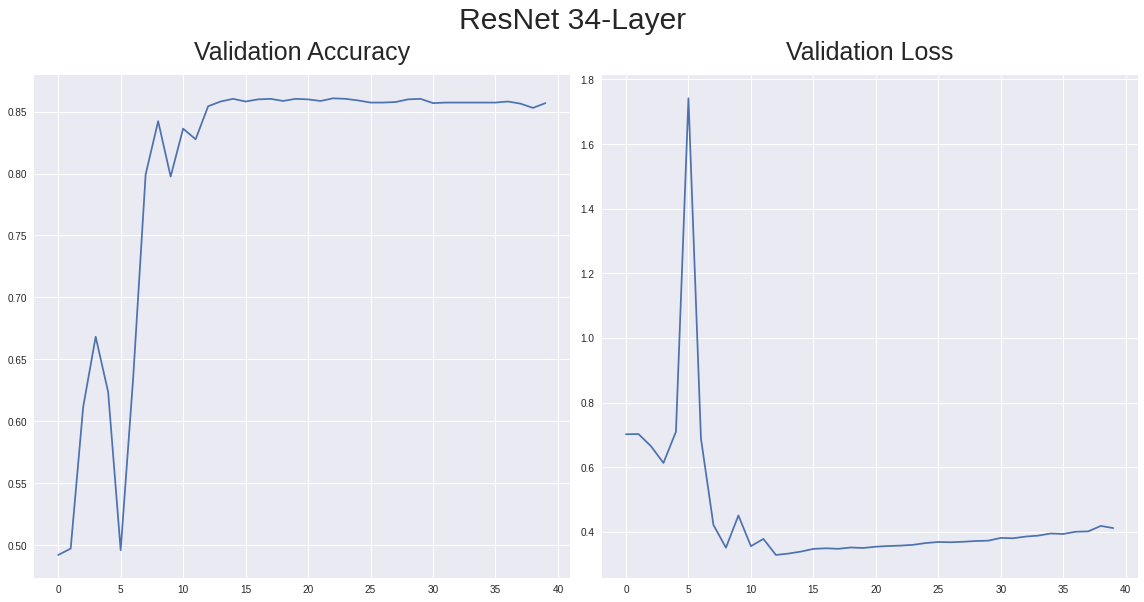

In [ ]:
# Layer 50
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(40)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
result = model_50.evaluate(test)

73/73 [==============================] - 11s 99ms/step - loss: 0.3886 - accuracy: 0.8598


## Plain Model

In [ ]:
# 34-layer ResNet Plain
# Naming을 위한 global variable
layer = 1
input_size = (224, 224, 3)

model_34_plain = build_resnet(input_size, num_blocks_ls, 2, is_plain=True)
model_34_plain.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 112, 112, 64)      9472      
                                                                 
 BN_1 (BatchNormalization)   (None, 112, 112, 64)      256       
                                                                 
 Acti_1 (Activation)         (None, 112, 112, 64)      0         
                                                                 
 MaxPooling2D_2 (MaxPooling2  (None, 56, 56, 64)       0         
 D)                                                              
                                                                 
 Stage1_1_Conv2D_1 (Conv2D)  (None, 56, 56, 64)        36928     
                                                           

In [18]:
# 50-layer ResNet Plain
# Naming을 위한 global variable
layer = 1
input_size = (224, 224, 3)

model_50_plain = build_resnet(input_size, num_blocks_ls, 2, is_50=True, is_plain=True)
model_50_plain.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 112, 112, 64)      9472      
                                                                 
 BN_1 (BatchNormalization)   (None, 112, 112, 64)      256       
                                                                 
 Acti_1 (Activation)         (None, 112, 112, 64)      0         
                                                                 
 MaxPooling2D_2 (MaxPooling2  (None, 56, 56, 64)       0         
 D)                                                              
                                                                 
 Stage1_1_Conv2D_1 (Conv2D)  (None, 56, 56, 64)        4160      
                                                             

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

file_path = path_drive + '/checkpoint_34_plain'
check_point = tf.keras.callbacks.ModelCheckpoint(file_path, verbose=1, save_best_only=True)
SGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
epochs = 15

model_34_plain.compile(SGD, loss='binary_crossentropy', metrics=['accuracy'])
history = model_34_plain.fit(train, validation_data=val, callbacks=[check_point, reduce_lr], epochs=epochs, use_multiprocessing=True)

Epoch 1/15
255/255 [==============================] - ETA: 0s - loss: 0.7206 - accuracy: 0.5076
Epoch 1: val_loss improved from inf to 0.70641, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 75s 242ms/step - loss: 0.7206 - accuracy: 0.5076 - val_loss: 0.7064 - val_accuracy: 0.5084 - lr: 0.1000
Epoch 2/15
255/255 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5458
Epoch 2: val_loss did not improve from 0.70641
255/255 [==============================] - 55s 180ms/step - loss: 0.6902 - accuracy: 0.5458 - val_loss: 0.7173 - val_accuracy: 0.4920 - lr: 0.1000
Epoch 3/15
255/255 [==============================] - ETA: 0s - loss: 0.6684 - accuracy: 0.5979
Epoch 3: val_loss did not improve from 0.70641
255/255 [==============================] - 54s 180ms/step - loss: 0.6684 - accuracy: 0.5979 - val_loss: 0.7112 - val_accuracy: 0.5260 - lr: 0.1000
Epoch 4/15
255/255 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.6254
Epoch 4: val_loss did not improve from 0.70641
255/255 [==============================] - 54s 181ms/step - loss: 0.6471 - accuracy: 0.6254 - val_loss: 1.3388 - val_accuracy: 0.4

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 68s 237ms/step - loss: 0.6381 - accuracy: 0.6353 - val_loss: 0.6388 - val_accuracy: 0.6369 - lr: 0.0100
Epoch 6/15
255/255 [==============================] - ETA: 0s - loss: 0.6174 - accuracy: 0.6551
Epoch 6: val_loss improved from 0.63879 to 0.62886, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 68s 235ms/step - loss: 0.6174 - accuracy: 0.6551 - val_loss: 0.6289 - val_accuracy: 0.6429 - lr: 0.0100
Epoch 7/15
255/255 [==============================] - ETA: 0s - loss: 0.6065 - accuracy: 0.6693
Epoch 7: val_loss did not improve from 0.62886
255/255 [==============================] - 54s 180ms/step - loss: 0.6065 - accuracy: 0.6693 - val_loss: 0.6484 - val_accuracy: 0.6326 - lr: 0.0100
Epoch 8/15
255/255 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.6835
Epoch 8: val_loss improved from 0.62886 to 0.58815, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 68s 236ms/step - loss: 0.5904 - accuracy: 0.6835 - val_loss: 0.5881 - val_accuracy: 0.6816 - lr: 0.0100
Epoch 9/15
255/255 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.7028
Epoch 9: val_loss did not improve from 0.58815
255/255 [==============================] - 54s 181ms/step - loss: 0.5727 - accuracy: 0.7028 - val_loss: 0.8032 - val_accuracy: 0.5621 - lr: 0.0100
Epoch 10/15
255/255 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7165
Epoch 10: val_loss did not improve from 0.58815
255/255 [==============================] - 54s 181ms/step - loss: 0.5540 - accuracy: 0.7165 - val_loss: 0.6462 - val_accuracy: 0.6369 - lr: 0.0100
Epoch 11/15
255/255 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.7363
Epoch 11: val_loss did not improve from 0.58815
255/255 [==============================] - 54s 181ms/step - loss: 0.5330 - accuracy: 0.7363 - val_loss: 1.1754 - val_accuracy:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 68s 237ms/step - loss: 0.5048 - accuracy: 0.7538 - val_loss: 0.5044 - val_accuracy: 0.7529 - lr: 1.0000e-03
Epoch 13/15
255/255 [==============================] - ETA: 0s - loss: 0.4896 - accuracy: 0.7624
Epoch 13: val_loss did not improve from 0.50445
255/255 [==============================] - 54s 181ms/step - loss: 0.4896 - accuracy: 0.7624 - val_loss: 0.5057 - val_accuracy: 0.7469 - lr: 1.0000e-03
Epoch 14/15
255/255 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.7673
Epoch 14: val_loss improved from 0.50445 to 0.49982, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50/assets


255/255 [==============================] - 68s 236ms/step - loss: 0.4861 - accuracy: 0.7673 - val_loss: 0.4998 - val_accuracy: 0.7555 - lr: 1.0000e-03
Epoch 15/15
255/255 [==============================] - ETA: 0s - loss: 0.4819 - accuracy: 0.7663
Epoch 15: val_loss did not improve from 0.49982
255/255 [==============================] - 54s 181ms/step - loss: 0.4819 - accuracy: 0.7663 - val_loss: 0.5016 - val_accuracy: 0.7533 - lr: 1.0000e-03


Text(0.5, 1.02, 'Validation Loss')

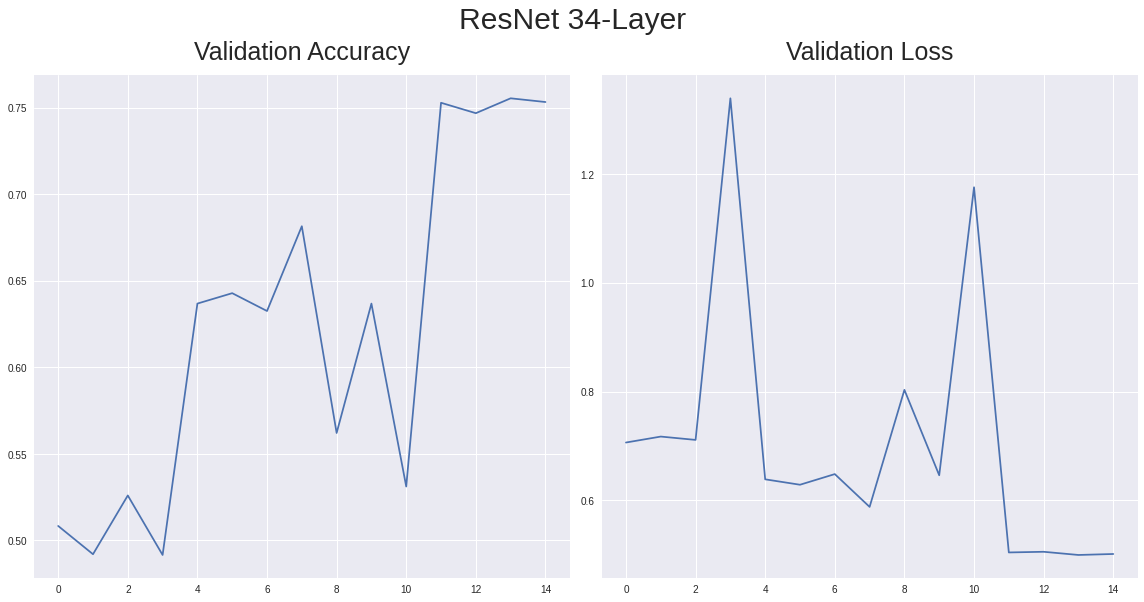

In [ ]:
# Layer 34 Plain
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(15)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
result = model_34_plain.evaluate(test)

73/73 [==============================] - 7s 57ms/step - loss: 0.5030 - accuracy: 0.7521


In [19]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

file_path = path_drive + '/checkpoint_50_plain'
check_point = tf.keras.callbacks.ModelCheckpoint(file_path, verbose=1, save_best_only=True)
SGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
epochs = 15

model_50_plain.compile(SGD, loss='binary_crossentropy', metrics=['accuracy'])
history = model_50_plain.fit(train, validation_data=val, callbacks=[check_point, reduce_lr], epochs=epochs, use_multiprocessing=True)

Epoch 1/15
255/255 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.4990
Epoch 1: val_loss improved from inf to 0.71662, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain/assets


255/255 [==============================] - 107s 331ms/step - loss: 0.7545 - accuracy: 0.4990 - val_loss: 0.7166 - val_accuracy: 0.4972 - lr: 0.1000
Epoch 2/15
255/255 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.5013
Epoch 2: val_loss improved from 0.71662 to 0.69372, saving model to /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/GoingDeeper/2/checkpoint_50_plain/assets


255/255 [==============================] - 89s 325ms/step - loss: 0.6971 - accuracy: 0.5013 - val_loss: 0.6937 - val_accuracy: 0.4985 - lr: 0.1000
Epoch 3/15
255/255 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5057
Epoch 3: val_loss did not improve from 0.69372
255/255 [==============================] - 74s 266ms/step - loss: 0.6940 - accuracy: 0.5057 - val_loss: 0.6955 - val_accuracy: 0.5028 - lr: 0.1000
Epoch 4/15
255/255 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5038
Epoch 4: val_loss did not improve from 0.69372
255/255 [==============================] - 73s 266ms/step - loss: 0.6948 - accuracy: 0.5038 - val_loss: 0.6947 - val_accuracy: 0.5045 - lr: 0.1000
Epoch 5/15
 40/255 [===>..........................] - ETA: 54s - loss: 0.6925 - accuracy: 0.5188

KeyboardInterrupt: ignored

Text(0.5, 1.02, 'Validation Loss')

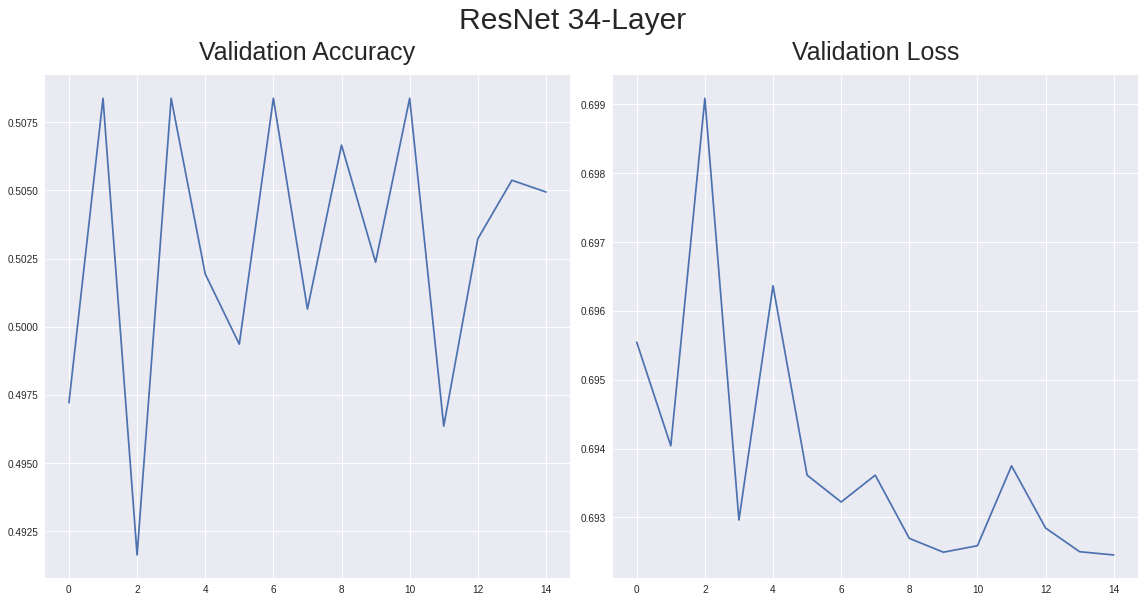

In [ ]:
# Layer 50 Plain
accuracy, loss = history.history['val_accuracy'], history.history['val_loss']
epoch = range(15)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("ResNet 34-Layer", y=1.04, size=30)

ax[0].plot(epoch, accuracy)
ax[0].set_title("Validation Accuracy", size=25, y=1.02)
ax[1].plot(epoch, loss)
ax[1].set_title("Validation Loss", size=25, y=1.02)

In [ ]:
result = model_50_plain.evaluate(test)

73/73 [==============================] - 9s 83ms/step - loss: 0.6918 - accuracy: 0.5129


# 최종 결과
__Ablation Study__  
___ResNet with skip connection vs Plain___  
_15 Epoch_

Test accuracy

||ResNet|Plain|
|:---:|:---:|:---:|
|34 Layer|87.04%|75.21%|
|50 Layer|85.98%|X|

Validation Accuracy

||ResNet|Plain|
|:---:|:---:|:---:|
|34 Layer|86.25%|75.33%|
|50 Layer|86.03%|X|

여러 차례 시도해보았지만 50-Layer Plain 의미있는  
결과를 내지 못했고, 결국 F1 score가 낮게 나왔다.

# 회고

처음으로 잘 알려진 모델을 end to end, 모든 것을 직접 구현했다.  
물론 검색해서 얻은 것들도 있지만, 이건 애초에 내 것이고 잘 꺼내썼다고 생각한다.(이 분야에서는 다들 그렇게 생각하니깐!)

앞선 노드를 통해 논문의 틀을 잡아 어떻게 읽어 나가는 것이 방향을 잡기 좋은 지를  
익혀 생각보다 쉽게 구현했던 것같다.  

아마 논문이 어렵다고 하는 것은   
새롭고 복잡한, 정보를 얻기 어려운 그러한 모델을 구현하는 것에 있지 않나 싶다.  
또한, cherry pick과 같은 논문 작성자의 양심의 문제도 구현하는 입장에서 까다롭지 않나 싶다. 

막상 모델을 만들고 나니 그냥 sequential하게 쭉 나열했어도 비슷한 길이가 나오지 않았을까 ㅋㅋㅋㅋ

다음 구현에서는 모델 윤곽을 잡고 어떤 식으로 묶어서 class, function define을 할지 계획해서 진행해야겠다는 교훈을 얻었다.  
</br>  


이번 경험을 통해 얻은 것 중 가장 뜻 깊은 것은  
텐서플로우의 동작을 대부분 경험, 실습했다는 것이다.  
tfds dataset, eager tensor, batch, prefetch, dataset.map() 등 다양한 class의 obeject를 다루고 구조를 익힐 수 있었다.  
또한 model.compile로 무엇을 할 수 있는지 더 배우게 되었다.  
예를 들면, callback에서 learning rate 조절을 time-based, drop-based로 나누어 이해했고  
다시 drop-based는 지표를 loss, 혹은 epoch 와 같은 여러 지표를 통해 구현할 수 있다.





마지막으로 Hyper Parameter의 중요성을 다시금 깨달았다.  
Learning Rate Schedule에 대해서 찾다가  
LR을 줄이지 말고 Batch Size를 늘리라는 논문으로  
여러 사람들이 포스팅한 글을 읽었고

생각보다 정말 많은 차이를 보여주는 점에서  
각 값에 따른 장점, 단점을 배웠다.  
</br>  

경험 상 큰 batch size가 좋은 결과를 보여줬는데,  
batch size가 작은 것이 `일반화`에는 좋은 것을 알았고,  
하지만 batch size가 크면 global optima에 빠르게 접근할 수 있다는 장점이 있었다.

learning rate에 대한 것은 동적으로 작동하는 것이 좋다는 것으로 충분하다고 생각하지만  
가중치-Loss 관계에서  
1. Saddle point
2. Plateau
3. local min

의 문제점을 계속 인지하고 있어야 좋지 않을까 싶다.
